In [ ]:
'''
회귀분석 전반에 대한 내용 및 문제점 해결 방법(피쳐 정규화)
https://yamalab.tistory.com/46?category=711359 
'''

In [2]:
import numpy as np
import pandas as pd


In [8]:
data = pd.read_csv('C:/Users/User/Desktop/Data/UniversalBank.csv')
data.head()
display(data['Personal Loan'])

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64

In [20]:
example = np.array([[1,2,3],
                    [2,3,1],
                    [1,1,2]])

In [6]:
class SoftmaxRegression:
    def __int__(self, learning_rate = 0.01, threshold = 0.01, max_iterations = 100000, verbose = False,
               reg_strength = 1e-5):                                      #defualt 값들 
        self._learning_rate = learning_rate #학습 계수 
        self._max_iterations = max_iterations #반복 횟수 
        self._threshold = threshold  #학습 중단 계수 
        self._verbose = verbose #중간 진행사항 출력 여부 
        self._reg_strength = reg_strength #정규화 파라미터 개수 
    
    #theta(W) 계수들 return 
    def get_coeff(self):
        return self._W
    
    #softmax function 
    def softmax_func(self, x_data):   #매개변수 
        predictions = x_data - (x_data.max(axis=1).reshape([-1,1])) #매개변수 수행문 
        #reshape[-1,1] : '-1'이 들어가 있는 '행(row)' 의 개수가 가변적으로 정해짐  -> n X 1 형태 
        softmax = np.exp(predictions) 
        softmax = softmax / softmax.sum(axis=1).reshape([-1,1]) 
        return softmax 
    
    #softmax function 
    def cost_func(self, softmax, y_data):
        sample_size = y_data.shape[0]  #shape[0] : shape의 0번째를 반환-> 행 갯수 
        #softmax[np.arange(len(softmax)),np.argmax(y_data,axis=1)] 
        #--> 해당 
        cost = -np.log(softmax[np.arange(len(softmax)),np.argmax(y_data,axis=1)]).sum()
        cost = cost / sample_size 
        cost = cost + (self._reg_strength * (self.W**2).sum()) / 2 
    
    
    #gradient 계산 (regularized)
    def gradient_func(self, softmax, x_data, y_data):
        sample_size = y.shape[0]
        
        #softmax cost function의 미분 결과는 pi-yi이므로
        #softmax가 계산된 matrix에서, (해당 one-hot의 class index * 해당 유닛)에 해당하는 유닛 위치에 -1을 더해줌 
        
        softmax[np.arange(len(softmax)), np.argmax(y_data, axis=1)] -= 1 
        gradient = np.dot(x_data.transpose(), softmax)/sample_size #dot 행렬곱
        gradient += self._reg_strength * self._W 
        return gradient 
    

In [21]:
a = SoftmaxRegression()
softmax = a.softmax_func(example)
a.cost_func()

array([[0.09003057, 0.24472847, 0.66524096],
       [0.24472847, 0.66524096, 0.09003057],
       [0.21194156, 0.21194156, 0.57611688]])

In [5]:
###다른 코드

In [2]:
import numpy as np

def softmax(a) :
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

a = np.array([0.3, 2.9, 4.0])

print(softmax(a)) # softmax 결과값 출력
print(sum(softmax(a))) # softmax 결과값들의 합은 1이 된다.


[0.01821127 0.24519181 0.73659691]
1.0


[0.21194156 0.21194156 0.57611688]
1.0


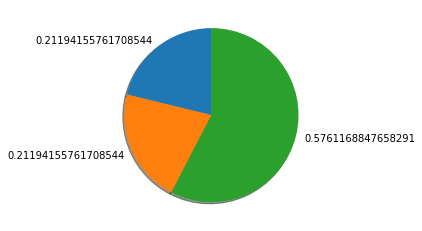

In [4]:
import numpy as np
import matplotlib.pyplot as plt
 
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()
 
x = np.array([1.0,1.0,2.0])
 
y = softmax(x)

print(y)
print(np.sum(y))
 
ratio = y
labels = y
 
plt.pie(ratio, labels=labels, shadow=True, startangle=90)
plt.show()